In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# A_sold = '97201-sold-6m.csv'
# B_sold = '97202-sold-6m.csv'

In [3]:
# A_sold = pd.read_csv(A_sold)
# B_sold = pd.read_csv(B_sold)

In [4]:
# sold_home_data = pd.merge(A_sold, B_sold, how="outer")
# sold_home_data.head(15)

In [5]:
# import glob
# import os
# os.chdir("Final-Project/Bryan/Download_Files")
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [6]:
sold_home_data = 'combined_csv.csv'
clean_sold_home_data = 'data_no_null.csv'
sold_df = pd.read_csv(clean_sold_home_data)
sold_df.head()

,SOLD DATE,ADDRESS,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
0,May-6-2020,8415 SE Schwind Cir,98664,699999,1,1.0,VANCOUVER: THE HEIGHTS (SW),100,15245,1960,106,7000,0,45.601924,-122.590982
1,April-15-2020,7607 SE Harney St,97206,229500,1,1.0,BRENTWOOD,504,5662,1949,127,455,0,45.463471,-122.585376
2,June-12-2020,7220 NE 33rd Dr,97211,265000,2,1.0,PORTLAND NORTHEAST,572,11761,1944,69,463,0,45.575460,-122.632957
3,May-27-2020,6804 SE 77th Ave,97206,250000,1,1.0,BRENTWOOD,577,5662,1927,85,433,0,45.473382,-122.583730
4,February-28-2020,3134 NE 76th Ave,97213,234600,1,1.0,ROSEWAY,600,4791,1914,174,391,0,45.545134,-122.584665


# Data Cleaning

In [7]:
#Getting rid of columns that are not needed so data are more easily viewed. 
# del sold_df['SALE TYPE']
# del sold_df['PROPERTY TYPE']
# del sold_df['STATE OR PROVINCE']
# del sold_df['STATUS']
# del sold_df['SOURCE']
# del sold_df['NEXT OPEN HOUSE START TIME']
# del sold_df['NEXT OPEN HOUSE END TIME']
# del sold_df['FAVORITE']
# del sold_df['INTERESTED']
# sold_df.head()

In [8]:
#Reviewing data types. 
dataTypeSeries = sold_df.dtypes
print(dataTypeSeries)

SOLD DATE              object
ADDRESS                object
ZIP OR POSTAL CODE      int64
PRICE                   int64
BEDS                    int64
BATHS                 float64
LOCATION               object
SQUARE FEET             int64
LOT SIZE                int64
YEAR BUILT              int64
DAYS ON MARKET          int64
$/SQUARE FEET           int64
HOA/MONTH               int64
LATITUDE              float64
LONGITUDE             float64
dtype: object


In [9]:
#Converting data types.
sold_df[['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 
         'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH']] = sold_df[['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 
         'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH']].apply(pd.to_numeric)
print(sold_df.dtypes)

SOLD DATE              object
ADDRESS                object
ZIP OR POSTAL CODE      int64
PRICE                   int64
BEDS                    int64
BATHS                 float64
LOCATION               object
SQUARE FEET             int64
LOT SIZE                int64
YEAR BUILT              int64
DAYS ON MARKET          int64
$/SQUARE FEET           int64
HOA/MONTH               int64
LATITUDE              float64
LONGITUDE             float64
dtype: object


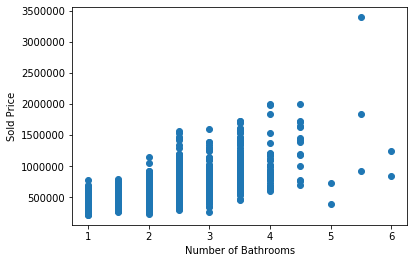

In [10]:
#Inspecting the data.  I can see there are outliers in price and number of bathrooms. 
bathrooms = sold_df['BATHS']
cost = sold_df['PRICE']
plt.scatter(bathrooms, cost)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Sold Price")
plt.show()

In [11]:
sold_df["SPLIT_ADDRESS"] = sold_df["ADDRESS"]
sold_df.head()

,SOLD DATE,ADDRESS,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,SPLIT_ADDRESS
0,May-6-2020,8415 SE Schwind Cir,98664,699999,1,1.0,VANCOUVER: THE HEIGHTS (SW),100,15245,1960,106,7000,0,45.601924,-122.590982,8415 SE Schwind Cir
1,April-15-2020,7607 SE Harney St,97206,229500,1,1.0,BRENTWOOD,504,5662,1949,127,455,0,45.463471,-122.585376,7607 SE Harney St
2,June-12-2020,7220 NE 33rd Dr,97211,265000,2,1.0,PORTLAND NORTHEAST,572,11761,1944,69,463,0,45.575460,-122.632957,7220 NE 33rd Dr
3,May-27-2020,6804 SE 77th Ave,97206,250000,1,1.0,BRENTWOOD,577,5662,1927,85,433,0,45.473382,-122.583730,6804 SE 77th Ave
4,February-28-2020,3134 NE 76th Ave,97213,234600,1,1.0,ROSEWAY,600,4791,1914,174,391,0,45.545134,-122.584665,3134 NE 76th Ave


In [12]:
#Changing the index to address. 
address_df = sold_df.set_index('ADDRESS')
address_df.head()

,SOLD DATE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,SPLIT_ADDRESS
ADDRESS,,,,,,,,,,,,,,,
8415 SE Schwind Cir,May-6-2020,98664,699999,1,1.0,VANCOUVER: THE HEIGHTS (SW),100,15245,1960,106,7000,0,45.601924,-122.590982,8415 SE Schwind Cir
7607 SE Harney St,April-15-2020,97206,229500,1,1.0,BRENTWOOD,504,5662,1949,127,455,0,45.463471,-122.585376,7607 SE Harney St
7220 NE 33rd Dr,June-12-2020,97211,265000,2,1.0,PORTLAND NORTHEAST,572,11761,1944,69,463,0,45.575460,-122.632957,7220 NE 33rd Dr
6804 SE 77th Ave,May-27-2020,97206,250000,1,1.0,BRENTWOOD,577,5662,1927,85,433,0,45.473382,-122.583730,6804 SE 77th Ave
3134 NE 76th Ave,February-28-2020,97213,234600,1,1.0,ROSEWAY,600,4791,1914,174,391,0,45.545134,-122.584665,3134 NE 76th Ave


In [13]:
#Dropping the outliers. 2681 was expensive. 1906 was multifamily. 8415 had incorrect square footage.
#filtered_df = address_df.drop(['2681 SW Buena Vista Dr', '1906 SE 72nd Ave', '8415 SE Schwind Cir'])
filtered_df = address_df.drop(['2681 SW Buena Vista Dr', '8415 SE Schwind Cir'])
filtered_df.head()

,SOLD DATE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,SPLIT_ADDRESS
ADDRESS,,,,,,,,,,,,,,,
7607 SE Harney St,April-15-2020,97206,229500,1,1.0,BRENTWOOD,504,5662,1949,127,455,0,45.463471,-122.585376,7607 SE Harney St
7220 NE 33rd Dr,June-12-2020,97211,265000,2,1.0,PORTLAND NORTHEAST,572,11761,1944,69,463,0,45.575460,-122.632957,7220 NE 33rd Dr
6804 SE 77th Ave,May-27-2020,97206,250000,1,1.0,BRENTWOOD,577,5662,1927,85,433,0,45.473382,-122.583730,6804 SE 77th Ave
3134 NE 76th Ave,February-28-2020,97213,234600,1,1.0,ROSEWAY,600,4791,1914,174,391,0,45.545134,-122.584665,3134 NE 76th Ave
6827 N Hudson St,July-15-2020,97203,350000,2,1.0,ST JOHNS,603,4791,1927,36,580,0,45.589185,-122.735387,6827 N Hudson St


# Data Exploration

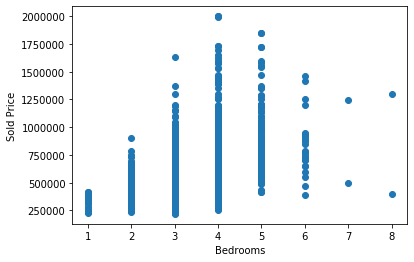

In [14]:
bedrooms = filtered_df['BEDS']
cost = filtered_df['PRICE']
plt.scatter(bedrooms, cost)
plt.xlabel("Bedrooms")
plt.ylabel("Sold Price")
plt.show()

In [15]:
#Created a centrality variable based on coordinates of Wells Fargo tower (tallest PDX building)
filtered_df['BATHS_PER_BED'] = (filtered_df['BATHS']/filtered_df['BEDS'])
central_lat_calc = (45.5142-(filtered_df['LATITUDE']))
central_lon_calc = (-122.6779-(filtered_df['LONGITUDE']))
filtered_df['CENTRAL_LAT_CALC'] = central_lat_calc.abs()
filtered_df['CENTRAL_LON_CALC'] = central_lon_calc.abs()
filtered_df['CENTRALITY'] = (filtered_df['CENTRAL_LAT_CALC']+filtered_df['CENTRAL_LON_CALC']) 
filtered_df['YARD SIZE'] = (filtered_df['LOT SIZE']-filtered_df['SQUARE FEET'])
filtered_df.head()

,SOLD DATE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,SPLIT_ADDRESS,BATHS_PER_BED,CENTRAL_LAT_CALC,CENTRAL_LON_CALC,CENTRALITY,YARD SIZE
ADDRESS,,,,,,,,,,,,,,,,,,,,
7607 SE Harney St,April-15-2020,97206,229500,1,1.0,BRENTWOOD,504,5662,1949,127,455,0,45.463471,-122.585376,7607 SE Harney St,1.0,0.050729,0.092524,0.143253,5158
7220 NE 33rd Dr,June-12-2020,97211,265000,2,1.0,PORTLAND NORTHEAST,572,11761,1944,69,463,0,45.575460,-122.632957,7220 NE 33rd Dr,0.5,0.061260,0.044943,0.106203,11189
6804 SE 77th Ave,May-27-2020,97206,250000,1,1.0,BRENTWOOD,577,5662,1927,85,433,0,45.473382,-122.583730,6804 SE 77th Ave,1.0,0.040818,0.094170,0.134988,5085
3134 NE 76th Ave,February-28-2020,97213,234600,1,1.0,ROSEWAY,600,4791,1914,174,391,0,45.545134,-122.584665,3134 NE 76th Ave,1.0,0.030934,0.093235,0.124170,4191
6827 N Hudson St,July-15-2020,97203,350000,2,1.0,ST JOHNS,603,4791,1927,36,580,0,45.589185,-122.735387,6827 N Hudson St,0.5,0.074985,0.057487,0.132472,4188


In [16]:
#Created another centrality variable based on coordinates of largest employer (OHSU)
# ohsu_lat_calc = (45.499207773346-(filtered_df['LATITUDE']))
# ohsu_lon_calc = (-122.68587113472-(filtered_df['LONGITUDE']))
# filtered_df['OHSU_LAT_CALC'] = ohsu_lat_calc.abs()
# filtered_df['OHSU_LON_CALC'] = ohsu_lon_calc.abs()
# filtered_df['OHSU_CENTRALITY'] = (filtered_df['OHSU_LAT_CALC']+filtered_df['OHSU_LON_CALC']) 

In [17]:
#Another centrality variable based on Pittock mansion (a point in the largest city park)
# pit_lat_calc = (45.5252-(filtered_df['LATITUDE']))
# pit_lon_calc = (-122.7163-(filtered_df['LONGITUDE']))
# filtered_df['PIT_LAT_CALC'] = pit_lat_calc.abs()
# filtered_df['PIT_LON_CALC'] = pit_lon_calc.abs()
# filtered_df['PIT_CENTRALITY'] = (filtered_df['PIT_LAT_CALC']+filtered_df['PIT_LON_CALC']) 

In [18]:
#Creating a yard size variable. 
filtered_df['YARD SIZE'] = (filtered_df['LOT SIZE']-filtered_df['SQUARE FEET'])

In [19]:
#Creating a bathrooms per bedroom ratio variable. 
baths_per_bed = (filtered_df['BATHS']/filtered_df['BEDS'])

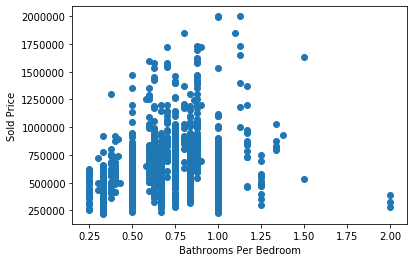

In [20]:
cost = filtered_df['PRICE']
plt.scatter(baths_per_bed, cost)
plt.xlabel("Bathrooms Per Bedroom")
plt.ylabel("Sold Price")
plt.show()

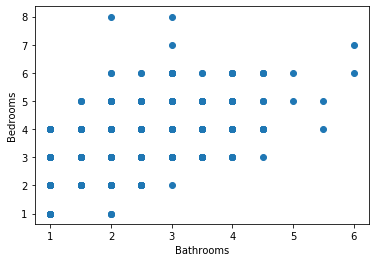

In [21]:
bathrooms = filtered_df['BATHS']
bedrooms = filtered_df['BEDS']
plt.scatter(bathrooms, bedrooms)
plt.xlabel("Bathrooms")
plt.ylabel("Bedrooms")
plt.show()

In [22]:
#Splitting address to create quadrant and side-street variables. 
address_df = filtered_df["SPLIT_ADDRESS"].str.split(" ", n = 3, expand = True) 

address_df.head()

,0,1,2,3
ADDRESS,,,,
7607 SE Harney St,7607,SE,Harney,St
7220 NE 33rd Dr,7220,NE,33rd,Dr
6804 SE 77th Ave,6804,SE,77th,Ave
3134 NE 76th Ave,3134,NE,76th,Ave
6827 N Hudson St,6827,N,Hudson,St


In [23]:
#Adding address variables to filtered dataframe. 
filtered_df["House Number"]= address_df[0] 
filtered_df["Quadrant"]= address_df[1]
filtered_df["Road Name"]= address_df[2]  
filtered_df["Road Type"]= address_df[3]

filtered_df.head()

,SOLD DATE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,SPLIT_ADDRESS,BATHS_PER_BED,CENTRAL_LAT_CALC,CENTRAL_LON_CALC,CENTRALITY,YARD SIZE,House Number,Quadrant,Road Name,Road Type
ADDRESS,,,,,,,,,,,,,,,,,,,,,,,,
7607 SE Harney St,April-15-2020,97206,229500,1,1.0,BRENTWOOD,504,5662,1949,127,455,0,45.463471,-122.585376,7607 SE Harney St,1.0,0.050729,0.092524,0.143253,5158,7607,SE,Harney,St
7220 NE 33rd Dr,June-12-2020,97211,265000,2,1.0,PORTLAND NORTHEAST,572,11761,1944,69,463,0,45.575460,-122.632957,7220 NE 33rd Dr,0.5,0.061260,0.044943,0.106203,11189,7220,NE,33rd,Dr
6804 SE 77th Ave,May-27-2020,97206,250000,1,1.0,BRENTWOOD,577,5662,1927,85,433,0,45.473382,-122.583730,6804 SE 77th Ave,1.0,0.040818,0.094170,0.134988,5085,6804,SE,77th,Ave
3134 NE 76th Ave,February-28-2020,97213,234600,1,1.0,ROSEWAY,600,4791,1914,174,391,0,45.545134,-122.584665,3134 NE 76th Ave,1.0,0.030934,0.093235,0.124170,4191,3134,NE,76th,Ave
6827 N Hudson St,July-15-2020,97203,350000,2,1.0,ST JOHNS,603,4791,1927,36,580,0,45.589185,-122.735387,6827 N Hudson St,0.5,0.074985,0.057487,0.132472,4188,6827,N,Hudson,St


In [24]:
#Combining eastside and westside "quandrants" into two variables for simplification.  
filtered_df = pd.get_dummies(filtered_df, columns=["Quadrant"])
filtered_df["Eastside"] = (filtered_df["Quadrant_N"] + filtered_df["Quadrant_SE"] + filtered_df["Quadrant_NE"] + filtered_df["Quadrant_E"])
filtered_df["Westside"] = (filtered_df["Quadrant_S"] + filtered_df["Quadrant_SW"] + filtered_df["Quadrant_NW"])
filtered_df.head()

,SOLD DATE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,SPLIT_ADDRESS,BATHS_PER_BED,CENTRAL_LAT_CALC,CENTRAL_LON_CALC,CENTRALITY,YARD SIZE,House Number,Road Name,Road Type,Quadrant_E,Quadrant_N,Quadrant_NE,Quadrant_NW,Quadrant_S,Quadrant_SE,Quadrant_SW,Eastside,Westside
ADDRESS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7607 SE Harney St,April-15-2020,97206,229500,1,1.0,BRENTWOOD,504,5662,1949,127,455,0,45.463471,-122.585376,7607 SE Harney St,1.0,0.050729,0.092524,0.143253,5158,7607,Harney,St,0,0,0,0,0,1,0,1,0
7220 NE 33rd Dr,June-12-2020,97211,265000,2,1.0,PORTLAND NORTHEAST,572,11761,1944,69,463,0,45.575460,-122.632957,7220 NE 33rd Dr,0.5,0.061260,0.044943,0.106203,11189,7220,33rd,Dr,0,0,1,0,0,0,0,1,0
6804 SE 77th Ave,May-27-2020,97206,250000,1,1.0,BRENTWOOD,577,5662,1927,85,433,0,45.473382,-122.583730,6804 SE 77th Ave,1.0,0.040818,0.094170,0.134988,5085,6804,77th,Ave,0,0,0,0,0,1,0,1,0
3134 NE 76th Ave,February-28-2020,97213,234600,1,1.0,ROSEWAY,600,4791,1914,174,391,0,45.545134,-122.584665,3134 NE 76th Ave,1.0,0.030934,0.093235,0.124170,4191,3134,76th,Ave,0,0,1,0,0,0,0,1,0
6827 N Hudson St,July-15-2020,97203,350000,2,1.0,ST JOHNS,603,4791,1927,36,580,0,45.589185,-122.735387,6827 N Hudson St,0.5,0.074985,0.057487,0.132472,4188,6827,Hudson,St,0,1,0,0,0,0,0,1,0


In [25]:
#Finding which streets are numeric vs non-numeric for side-street variable. 
#Cesar Chavez is example.  Named even though it is 39th and runs North-South. SE Milwaukie is another, which is 12th. 
road_split = list(map(lambda i: i[ : -2], filtered_df["Road Name"]))
filtered_df["Road Cat"] = road_split


filtered_df["Road Bool"] = filtered_df["Road Cat"].str.isnumeric()
#True are numbered streets, as in Road Bool_True.  False are alpha streets. 

filtered_df = pd.get_dummies(filtered_df, columns=["Road Bool"])
filtered_df.head()

,SOLD DATE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,SPLIT_ADDRESS,BATHS_PER_BED,CENTRAL_LAT_CALC,CENTRAL_LON_CALC,CENTRALITY,YARD SIZE,House Number,Road Name,Road Type,Quadrant_E,Quadrant_N,Quadrant_NE,Quadrant_NW,Quadrant_S,Quadrant_SE,Quadrant_SW,Eastside,Westside,Road Cat,Road Bool_False,Road Bool_True
ADDRESS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7607 SE Harney St,April-15-2020,97206,229500,1,1.0,BRENTWOOD,504,5662,1949,127,455,0,45.463471,-122.585376,7607 SE Harney St,1.0,0.050729,0.092524,0.143253,5158,7607,Harney,St,0,0,0,0,0,1,0,1,0,Harn,1,0
7220 NE 33rd Dr,June-12-2020,97211,265000,2,1.0,PORTLAND NORTHEAST,572,11761,1944,69,463,0,45.575460,-122.632957,7220 NE 33rd Dr,0.5,0.061260,0.044943,0.106203,11189,7220,33rd,Dr,0,0,1,0,0,0,0,1,0,33,0,1
6804 SE 77th Ave,May-27-2020,97206,250000,1,1.0,BRENTWOOD,577,5662,1927,85,433,0,45.473382,-122.583730,6804 SE 77th Ave,1.0,0.040818,0.094170,0.134988,5085,6804,77th,Ave,0,0,0,0,0,1,0,1,0,77,0,1
3134 NE 76th Ave,February-28-2020,97213,234600,1,1.0,ROSEWAY,600,4791,1914,174,391,0,45.545134,-122.584665,3134 NE 76th Ave,1.0,0.030934,0.093235,0.124170,4191,3134,76th,Ave,0,0,1,0,0,0,0,1,0,76,0,1
6827 N Hudson St,July-15-2020,97203,350000,2,1.0,ST JOHNS,603,4791,1927,36,580,0,45.589185,-122.735387,6827 N Hudson St,0.5,0.074985,0.057487,0.132472,4188,6827,Hudson,St,0,1,0,0,0,0,0,1,0,Huds,1,0


In [26]:
#Altering data type of date so I can consider it as a variable. But this is no good because seller doesn't "know" 
#the date in advance.
sold_date_df = filtered_df["SOLD DATE"].str.split("-", n = 2, expand = True)
sold_date_df.head()

filtered_df["Month Sold"]= sold_date_df[0] 
filtered_df["Date Sold"]= sold_date_df[1]
filtered_df["Year Sold"]= sold_date_df[2]  

In [27]:
filtered_df = pd.get_dummies(filtered_df, columns=["Month Sold"])
filtered_df.columns

Index(['SOLD DATE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE', 'SPLIT_ADDRESS', 'BATHS_PER_BED', 'CENTRAL_LAT_CALC', 'CENTRAL_LON_CALC', 'CENTRALITY', 'YARD SIZE', 'House Number', 'Road Name', 'Road Type', 'Quadrant_E', 'Quadrant_N', 'Quadrant_NE', 'Quadrant_NW', 'Quadrant_S', 'Quadrant_SE', 'Quadrant_SW', 'Eastside', 'Westside', 'Road Cat', 'Road Bool_False', 'Road Bool_True', 'Date Sold', 'Year Sold', 'Month Sold_April', 'Month Sold_August', 'Month Sold_February', 'Month Sold_July', 'Month Sold_June', 'Month Sold_March', 'Month Sold_May'], dtype='object')

In [28]:
#Converting the sold date to a numeric value. 
import datetime as dt
filtered_df['Date_Numeric'] = pd.to_datetime(filtered_df['SOLD DATE'])
filtered_df['Date_Numeric']=filtered_df['Date_Numeric'].map(dt.datetime.toordinal)
filtered_df.head()

,SOLD DATE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,SPLIT_ADDRESS,BATHS_PER_BED,CENTRAL_LAT_CALC,CENTRAL_LON_CALC,CENTRALITY,YARD SIZE,House Number,Road Name,Road Type,Quadrant_E,Quadrant_N,Quadrant_NE,Quadrant_NW,Quadrant_S,Quadrant_SE,Quadrant_SW,Eastside,Westside,Road Cat,Road Bool_False,Road Bool_True,Date Sold,Year Sold,Month Sold_April,Month Sold_August,Month Sold_February,Month Sold_July,Month Sold_June,Month Sold_March,Month Sold_May,Date_Numeric
ADDRESS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7607 SE Harney St,April-15-2020,97206,229500,1,1.0,BRENTWOOD,504,5662,1949,127,455,0,45.463471,-122.585376,7607 SE Harney St,1.0,0.050729,0.092524,0.143253,5158,7607,Harney,St,0,0,0,0,0,1,0,1,0,Harn,1,0,15,2020,1,0,0,0,0,0,0,737530
7220 NE 33rd Dr,June-12-2020,97211,265000,2,1.0,PORTLAND NORTHEAST,572,11761,1944,69,463,0,45.575460,-122.632957,7220 NE 33rd Dr,0.5,0.061260,0.044943,0.106203,11189,7220,33rd,Dr,0,0,1,0,0,0,0,1,0,33,0,1,12,2020,0,0,0,0,1,0,0,737588
6804 SE 77th Ave,May-27-2020,97206,250000,1,1.0,BRENTWOOD,577,5662,1927,85,433,0,45.473382,-122.583730,6804 SE 77th Ave,1.0,0.040818,0.094170,0.134988,5085,6804,77th,Ave,0,0,0,0,0,1,0,1,0,77,0,1,27,2020,0,0,0,0,0,0,1,737572
3134 NE 76th Ave,February-28-2020,97213,234600,1,1.0,ROSEWAY,600,4791,1914,174,391,0,45.545134,-122.584665,3134 NE 76th Ave,1.0,0.030934,0.093235,0.124170,4191,3134,76th,Ave,0,0,1,0,0,0,0,1,0,76,0,1,28,2020,0,0,1,0,0,0,0,737483
6827 N Hudson St,July-15-2020,97203,350000,2,1.0,ST JOHNS,603,4791,1927,36,580,0,45.589185,-122.735387,6827 N Hudson St,0.5,0.074985,0.057487,0.132472,4188,6827,Hudson,St,0,1,0,0,0,0,0,1,0,Huds,1,0,15,2020,0,0,0,1,0,0,0,737621


In [29]:
#Calcuating the date the home was listed for sale.  
filtered_df["List_Date"] = ((filtered_df["Date_Numeric"]) - (filtered_df["DAYS ON MARKET"]))
filtered_df.head()

,SOLD DATE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,SPLIT_ADDRESS,BATHS_PER_BED,CENTRAL_LAT_CALC,CENTRAL_LON_CALC,CENTRALITY,YARD SIZE,House Number,Road Name,Road Type,Quadrant_E,Quadrant_N,Quadrant_NE,Quadrant_NW,Quadrant_S,Quadrant_SE,Quadrant_SW,Eastside,Westside,Road Cat,Road Bool_False,Road Bool_True,Date Sold,Year Sold,Month Sold_April,Month Sold_August,Month Sold_February,Month Sold_July,Month Sold_June,Month Sold_March,Month Sold_May,Date_Numeric,List_Date
ADDRESS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7607 SE Harney St,April-15-2020,97206,229500,1,1.0,BRENTWOOD,504,5662,1949,127,455,0,45.463471,-122.585376,7607 SE Harney St,1.0,0.050729,0.092524,0.143253,5158,7607,Harney,St,0,0,0,0,0,1,0,1,0,Harn,1,0,15,2020,1,0,0,0,0,0,0,737530,737403
7220 NE 33rd Dr,June-12-2020,97211,265000,2,1.0,PORTLAND NORTHEAST,572,11761,1944,69,463,0,45.575460,-122.632957,7220 NE 33rd Dr,0.5,0.061260,0.044943,0.106203,11189,7220,33rd,Dr,0,0,1,0,0,0,0,1,0,33,0,1,12,2020,0,0,0,0,1,0,0,737588,737519
6804 SE 77th Ave,May-27-2020,97206,250000,1,1.0,BRENTWOOD,577,5662,1927,85,433,0,45.473382,-122.583730,6804 SE 77th Ave,1.0,0.040818,0.094170,0.134988,5085,6804,77th,Ave,0,0,0,0,0,1,0,1,0,77,0,1,27,2020,0,0,0,0,0,0,1,737572,737487
3134 NE 76th Ave,February-28-2020,97213,234600,1,1.0,ROSEWAY,600,4791,1914,174,391,0,45.545134,-122.584665,3134 NE 76th Ave,1.0,0.030934,0.093235,0.124170,4191,3134,76th,Ave,0,0,1,0,0,0,0,1,0,76,0,1,28,2020,0,0,1,0,0,0,0,737483,737309
6827 N Hudson St,July-15-2020,97203,350000,2,1.0,ST JOHNS,603,4791,1927,36,580,0,45.589185,-122.735387,6827 N Hudson St,0.5,0.074985,0.057487,0.132472,4188,6827,Hudson,St,0,1,0,0,0,0,0,1,0,Huds,1,0,15,2020,0,0,0,1,0,0,0,737621,737585


In [30]:
#Determining if location is a variable we could use.  There are 142 locations out of 2294 homes.  
#Not enough time to condense number, and we have other location variables. 
#filtered_df['LOCATION'].nunique()

In [31]:
#Looking at HOA/Month as a variable. Only 26 of 2294 homes (~1.1%) have HOA. Unlikely to be useful. 
# filtered_df = pd.get_dummies(filtered_df, columns=["HOA/MONTH"])
# filtered_df.columns

# Model Variable Relationships with Price

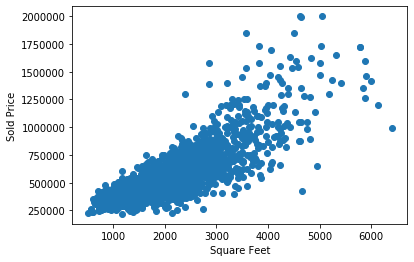

In [32]:
size = filtered_df['SQUARE FEET']
cost = filtered_df['PRICE']
plt.scatter(size, cost)
plt.xlabel("Square Feet")
plt.ylabel("Sold Price")
plt.show()

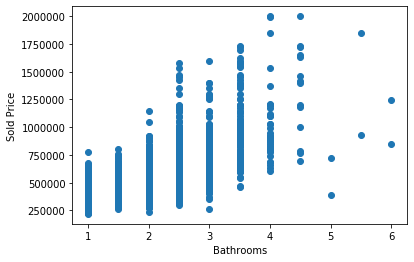

In [33]:
bathrooms = filtered_df['BATHS']
cost = filtered_df['PRICE']
plt.scatter(bathrooms, cost)
plt.xlabel("Bathrooms")
plt.ylabel("Sold Price")
plt.show()

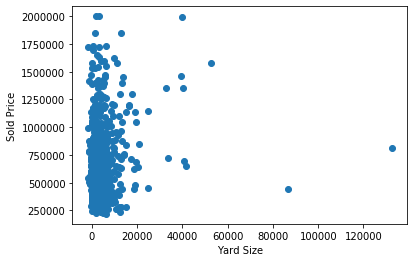

In [34]:
yard = filtered_df['YARD SIZE']
cost = filtered_df['PRICE']
plt.scatter(yard, cost)
plt.xlabel("Yard Size")
plt.ylabel("Sold Price")
plt.show()

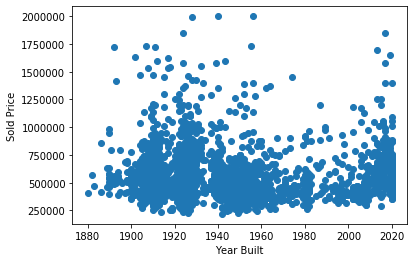

In [35]:
yearbuilt = filtered_df['YEAR BUILT']
cost = filtered_df['PRICE']
plt.scatter(yearbuilt, cost)
plt.xlabel("Year Built")
plt.ylabel("Sold Price")
plt.show()

In [36]:
filtered_df['YEAR BUILT'].describe()

count    2291.000000
mean     1944.051069
std        34.863333
min      1880.000000
25%      1919.000000
50%      1932.000000
75%      1957.000000
max      2020.000000
Name: YEAR BUILT, dtype: float64

In [37]:
split_years = pd.cut((filtered_df['YEAR BUILT']), 3)
filtered_df["YEAR BUILT CATEGORY"] = split_years
filtered_df.head()

#data = filtered_df.copy()
#data_binary_encoded = pd.get_dummies(filtered_df, columns=["YEAR BUILT CATEGORY"])

#filtered_df = pd.get_dummies(filtered_df, columns=["YEAR BUILT CATEGORY"])
#filtered_df.rename(columns = {'YEAR BUILT CATEGORY_(1860.841, 1914.0]': 'YEAR_CAT_1'})
#filtered_df.rename(columns = {'YEAR BUILT CATEGORY_(1914.0, 1967.0]': 'YEAR_CAT_2'})
#filtered_df.rename(columns = {'YEAR BUILT CATEGORY_(1967.0, 2020.0]': 'YEAR_CAT_3'})

,SOLD DATE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,SPLIT_ADDRESS,BATHS_PER_BED,CENTRAL_LAT_CALC,CENTRAL_LON_CALC,CENTRALITY,YARD SIZE,House Number,Road Name,Road Type,Quadrant_E,Quadrant_N,Quadrant_NE,Quadrant_NW,Quadrant_S,Quadrant_SE,Quadrant_SW,Eastside,Westside,Road Cat,Road Bool_False,Road Bool_True,Date Sold,Year Sold,Month Sold_April,Month Sold_August,Month Sold_February,Month Sold_July,Month Sold_June,Month Sold_March,Month Sold_May,Date_Numeric,List_Date,YEAR BUILT CATEGORY
ADDRESS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7607 SE Harney St,April-15-2020,97206,229500,1,1.0,BRENTWOOD,504,5662,1949,127,455,0,45.463471,-122.585376,7607 SE Harney St,1.0,0.050729,0.092524,0.143253,5158,7607,Harney,St,0,0,0,0,0,1,0,1,0,Harn,1,0,15,2020,1,0,0,0,0,0,0,737530,737403,"(1926.667, 1973.333]"
7220 NE 33rd Dr,June-12-2020,97211,265000,2,1.0,PORTLAND NORTHEAST,572,11761,1944,69,463,0,45.575460,-122.632957,7220 NE 33rd Dr,0.5,0.061260,0.044943,0.106203,11189,7220,33rd,Dr,0,0,1,0,0,0,0,1,0,33,0,1,12,2020,0,0,0,0,1,0,0,737588,737519,"(1926.667, 1973.333]"
6804 SE 77th Ave,May-27-2020,97206,250000,1,1.0,BRENTWOOD,577,5662,1927,85,433,0,45.473382,-122.583730,6804 SE 77th Ave,1.0,0.040818,0.094170,0.134988,5085,6804,77th,Ave,0,0,0,0,0,1,0,1,0,77,0,1,27,2020,0,0,0,0,0,0,1,737572,737487,"(1926.667, 1973.333]"
3134 NE 76th Ave,February-28-2020,97213,234600,1,1.0,ROSEWAY,600,4791,1914,174,391,0,45.545134,-122.584665,3134 NE 76th Ave,1.0,0.030934,0.093235,0.124170,4191,3134,76th,Ave,0,0,1,0,0,0,0,1,0,76,0,1,28,2020,0,0,1,0,0,0,0,737483,737309,"(1879.86, 1926.667]"
6827 N Hudson St,July-15-2020,97203,350000,2,1.0,ST JOHNS,603,4791,1927,36,580,0,45.589185,-122.735387,6827 N Hudson St,0.5,0.074985,0.057487,0.132472,4188,6827,Hudson,St,0,1,0,0,0,0,0,1,0,Huds,1,0,15,2020,0,0,0,1,0,0,0,737621,737585,"(1926.667, 1973.333]"


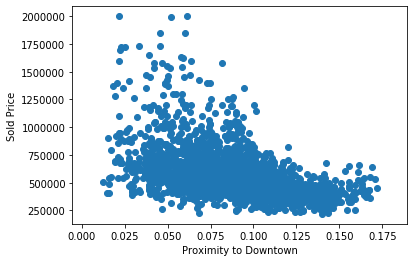

In [38]:
dt_location = filtered_df['CENTRALITY']
cost = filtered_df['PRICE']
plt.scatter(dt_location, cost)
plt.xlabel("Proximity to Downtown")
plt.ylabel("Sold Price")
plt.show()

In [39]:
# lat_location = filtered_df['CENTRAL_LAT_CALC']
# cost = filtered_df['PRICE']
# plt.scatter(lat_location, cost)
# plt.xlabel("Proximity to DT Latitude")
# plt.ylabel("Sold Price")
# plt.show()

In [40]:
# lon_location = filtered_df['CENTRAL_LON_CALC']
# cost = filtered_df['PRICE']
# plt.scatter(lon_location, cost)
# plt.xlabel("Proximity to DT Longitude")
# plt.ylabel("Sold Price")
# plt.show()

In [41]:
# ohsu_location = filtered_df['OHSU_CENTRALITY']
# cost = filtered_df['PRICE']
# plt.scatter(ohsu_location, cost)
# plt.xlabel("Proximity to Largest Employer")
# plt.ylabel("Sold Price")
# plt.show()

In [42]:
# park_location = filtered_df['PIT_CENTRALITY']
# cost = filtered_df['PRICE']
# plt.scatter(park_location, cost)
# plt.xlabel("Proximity to Largest Park")
# plt.ylabel("Sold Price")
# plt.show()

In [43]:
# landsize = filtered_df['LOT SIZE']
# cost = filtered_df['PRICE']
# plt.scatter(landsize, cost)
# plt.xlabel("Square Feet of Property")
# plt.ylabel("Sold Price")
# plt.show()

In [44]:
# landsize = filtered_df['LOT SIZE']
# size = filtered_df['SQUARE FEET']
# plt.scatter(landsize, size)
# plt.xlabel("Square Feet of Property")
# plt.ylabel("Square Feet of Home")
# plt.show()

In [45]:
# location = filtered_df['ZIP OR POSTAL CODE']
# cost = filtered_df['PRICE']
# plt.scatter(location, cost)
# plt.xlabel("Zip Code")
# plt.ylabel("Sold Price")
# plt.show()

In [46]:
# marketdays = filtered_df['DAYS ON MARKET']
# cost = filtered_df['PRICE']
# plt.scatter(marketdays, cost)
# plt.xlabel("Days on Market")
# plt.ylabel("Sold Price")
# plt.show()

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [50]:
selectVariables_df = filtered_df[["PRICE", "BEDS", "BATHS", "SQUARE FEET", "LOT SIZE", "CENTRALITY", "YEAR BUILT", "Westside", "Road Bool_True", "Month Sold_February", "Month Sold_March", "Month Sold_April", "Month Sold_May", "Month Sold_June", "Month Sold_July", "DAYS ON MARKET", "Date_Numeric", "List_Date"]]
regression_df = selectVariables_df.dropna()

In [51]:
x = regression_df[["BATHS", "BEDS", "SQUARE FEET", "LOT SIZE", "YEAR BUILT", "Road Bool_True", "Westside"]]
y = regression_df[["PRICE"]]

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train)

In [54]:
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [55]:
# model.fit(x_train_scaled, y_train_scaled)
# training_score = model.score(x_train_scaled, y_train_scaled)
# print(f"Training Score: {training_score}")

In [56]:
# testing_score = model.score(x_test_scaled, y_test_scaled)
# print(f"Testing Score: {testing_score}")

In [57]:
# reg_scaled = LinearRegression().fit(x_test_scaled, y_test_scaled)
# reg_scaled.coef_

In [58]:
# reg_scaled.intercept_

In [59]:
model.fit(x_train, y_train)
training_score = model.score(x_train, y_train)
print(f"Training Score: {training_score}")

Training Score: 0.7160741557425814


In [60]:
testing_score = model.score(x_test, y_test)
print(f"Testing Score: {testing_score}")

Testing Score: 0.6861437708657454


In [61]:
reg = LinearRegression().fit(x_test, y_test)
reg.coef_

array([[ 7.09451279e+04, -2.16010849e+04,  1.79826361e+02,
         4.17162626e+00,  3.90869134e+01,  2.25149927e+04,
         2.73644290e+04]])

In [62]:
reg.intercept_

array([1812.95774518])

In [164]:
bath_entry = 4.5
bed_entry = 4
square_feet_entry = 5055
lot_size_entry = 8276
year_built_entry = 1940
latitude_entry = 45.5127242
longitude_entry = -122.6981
westside_1_west_0_east = 1
street_1_num_0_alpha = 0

In [165]:
home_value = 1812.95 + (bath_entry *(70945.12)) + (bed_entry *(-21601.08)) + (square_feet_entry *(179.82)) + (lot_size_entry *(4.17)) + (year_built_entry * (39.08)) + (street_1_num_0_alpha *(22541.99)) + (westside_1_west_0_east *(27364.42))
#home_value = 66749.73 + (bath_entry *(63371.10)) + (square_feet_entry *(170.25)) + (lot_size_entry *(4.05)) + (year_built_entry * (-11.00)) + (street_1_num_0_alpha *(22040.71)) + (westside_1_west_0_east *(29053.87))
print(f"Based on the entered parameters, the home is worth the following: ${home_value}")

Based on the entered parameters, the home is worth the following: $1253765.1


bath_entry = 1.5
square_feet_entry = 2125
lot_size_entry = 4791
year_built_entry = 1930
latitude_entry = 45.5338925
longitude_entry = -122.60328
westside_1_west_0_east = 0
street_1_num_0_alpha = 0

In [129]:
# home_lat_calc = (45.5142-(latitude_entry))
# home_lon_calc = (-122.6779-(longitude_entry))
#temp_df = pd.DataFrame({"Working Lat": [home_lat_calc],
                        #"Working Lon": [home_lon_calc]})
#temp_df
#home_lat_calc

In [130]:
#TempdataTypeSeries = temp_df.dtypes
#print(TempdataTypeSeries)

In [131]:
#temp_df[['Working Lat', 'Working Lon']] = temp_df[['Working Lat', 'Working Lon']].astype(int)
#print(temp_df.dtypes)

In [132]:
#home_abs_lat = temp_df['Working Lat'].abs()
#home_abs_lon = temp_df['Working Lon'].abs()
#home_abs_lat = home_lat_calc.abs()
#home_abs_lon = home_lon_calc.abs()
#home_centrality = (home_abs_lat + home_abs_lon) 
#print(f"Current centrality value: {home_centrality}")

Current centrality value: 0    0
dtype: int64


In [105]:
#home_value = -167724.68748562 + (bath_entry *(63367.85)) + (square_feet_entry *(151.70)) + (lot_size_entry *(5.46)) + (home_centrality * (-1236504.82)) + (year_built_entry * (182.25)) + (street_1_num_0_alpha *(21590.63)) + (westside_1_west_0_east *(-22036.9598))
#print(f"Based on the entered parameters, the home is worth the following: ${home_value}")

Based on the entered parameters, the home is worth the following: $0    627590.947514
dtype: float64


In [ ]:
#equation with absolute value incorporated 
#home_value =  1.3206758e+17 + (bath_entry *(6.27181503e+04)) + (square_feet_entry *(1.56984117e+02)) + (lot_size_entry *(5.44307740e+00)) + ((((45.5142 - latitude_entry).abs()) + ((-122.6779 - longitude_entry).abs())) * (-1.23688324e+06)) + (year_built_entry * (1.79410958e+02)) + (westside_1_west_0_east * (-2.07152672e+04)) + (street_1_num_0_alpha *(2.05346613e+04))

In [ ]:
#5833 NE Halsey
# bath_entry = 1.5
# square_feet_entry = 2125
# lot_size_entry = 4791
# year_built_entry = 1930
# latitude_entry = 45.5338925
# longitude_entry = -122.60328
# westside_1_west_0_east = 0
# street_1_num_0_alpha = 0

#true_value = 387,000
#predicted_value = 521,761

In [ ]:
#6908 SE Cesar E Chavez Blvd
# bath_entry = 2
# square_feet_entry = 2135
# lot_size_entry = 6969
# year_built_entry = 1953
# latitude_entry = 45.4731879
# longitude_entry = -122.62232
# westside_1_west_0_east = 0
# street_1_num_0_alpha = 0

#true_value = 525,000
#predicted_value = 681,491

In [ ]:
#6400 NW Cornell Rd
# bath_entry = 2
# square_feet_entry = 2180
# lot_size_entry = 88862
# year_built_entry = 1936
# latitude_entry = 45.5343558
# longitude_entry = -122.74429
# westside_1_west_0_east = 1
# street_1_num_0_alpha = 0

#true_value = 445,000
#predicted_value = 18.11

In [ ]:
#2028 SW Jackson st
# bath_entry = 4.5
# square_feet_entry = 5055
# lot_size_entry = 8276
# year_built_entry = 1940
# latitude_entry = 45.5127242
# longitude_entry = -122.6981
# westside_1_west_0_east = 1
# street_1_num_0_alpha = 0

#true_value = 2,000,000
#predicted_value = 20.64